# Homework 2

Problem Description: 

The purpose of this homework will be to identify potential jargon. In order to accomplish this we will employ two small small document corpora. One will be related to news and the other will be from government documents. Your task will be to implement a simple jargon identifier.

In order to accomplish this task you will need to perform several steps. The first relates to identifying the word distributions in the base corpus. We will be using the Reuters news corpus as it is freely available in NLTK. For a jargon corpus we will be making use of DOD OIG reports that we have seen in the past.

A first step will be to tokenize the documents in both sets. Then, you will try to simply look at the differences in tokens seen.

But just looking at token differences isn't very sophisticated. We will also try to compare the probability of tokens occuring in each corpus as a mechanism to evaluate which tokens might be jargon.

### Step 0: Preparation

In [1]:
import nltk.data
from nltk.corpus import reuters
from os import listdir
from os.path import isfile, join
from nltk.util import bigrams 
from nltk.tokenize import TreebankWordTokenizer
sentence_tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
treebank_tokenizer = TreebankWordTokenizer()
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))
from nltk.stem.porter import *
porter_stemmer = PorterStemmer()

### Step 1: Get a sample corpus

In [2]:
doc_texts = []
base_corpus_tokens = []

In [3]:
num_docs = len(reuters.fileids())

for doc in reuters.fileids()[0:100]:  # here I used the first 100 pieces of news to build my base corpus
    doc_text = reuters.open(doc).read()
    doc_texts.append(doc_text)
    
paragraph = str(doc_texts).split("\\n" )

In [4]:
tokens = treebank_tokenizer.tokenize(str(paragraph))

In [5]:
min_token_length = 2

# I modify the codes from lecture notes to identify all possible noise words
def isNoise(token):     
    is_noise = False
    if porter_stemmer.stem(token) in stopWords:
        is_noise = True
    elif len(token.strip()) < min_token_length:
        is_noise = True
    elif re.findall(r"\,|\`|\'", token):
        is_noise = True
    return is_noise 

In [6]:
base_corpus_tokens  = [word.strip("\\") for word in tokens if not isNoise(word)]
print(base_corpus_tokens)

['EXPORTERS', 'FEAR', 'DAMAGE', 'U.S.-JAPAN', 'RIFT', 'Mounting', 'trade', 'friction', 'U.S.', 'Japan', 'has', 'raised', 'fears', 'among', 'many', 'Asia', 'exporting', 'nations', 'row', 'could', 'inflict', 'far-reaching', 'economic', 'damage', 'businessmen', 'officials', 'said.', 'told', 'Reuter', 'correspondents', 'Asian', 'capitals', 'U.S.', 'Move', 'Japan', 'might', 'boost', 'protectionist', 'sentiment', 'U.S.', 'lead', 'curbs', 'American', 'imports', 'products.', 'exporters', 'said', 'conflict', 'would', 'hurt', 'long-run', 'short-term', 'Tokyo', 'loss', 'might', 'gain.', 'U.S.', 'Has', 'said', 'impose', '300', 'mln', 'dlrs', 'tariffs', 'imports', 'Japanese', 'electronics', 'goods', 'April', '17', 'retaliation', 'Japan', 'alleged', 'failure', 'stick', 'pact', 'sell', 'semiconductors', 'world', 'markets', 'cost.', 'Unofficial', 'Japanese', 'estimates', 'put', 'impact', 'tariffs', '10', 'billion', 'dlrs', 'spokesmen', 'major', 'electronics', 'firms', 'said', 'would', 'virtually', 'ha

### Step 2: Get a potential jargon corpus

In [7]:
dir_base = "C:/Users/23140/Desktop/f19_ds_nlp-master/homeworks/homework_2/data/"


def read_file(filename):
    input_file_text = open(filename , encoding='utf-8').read()
    return input_file_text

    
def read_directory_files(directory):
    file_texts = []
    files = [f for f in listdir(directory) if isfile(join(directory, f))]
    for f in files:
        file_text = read_file(join(directory, f))
        file_texts.append({"file":f, "content": file_text })
    return file_texts
    
jargon_corpus = read_directory_files(dir_base)

In [8]:
jargon_tokens = []
jargon_token = []

for item in jargon_corpus:
    jargon_token = treebank_tokenizer.tokenize(item["content"])
    jargon_tokens += jargon_token

jargon_tokens = [word for word in jargon_tokens if not isNoise(word)]
print(jargon_tokens)

['May', '21', '2018', 'Objective', 'We', 'determined', 'whether', 'Air', 'Force', 'officials', 'updated', 'Eagle', 'Passive/Active', 'Warning', 'Survivability', 'System', 'EPAWSS', 'test', 'evaluation', 'master', 'plan', 'respond', 'concerns', 'raised', 'Air', 'Force', 'DoD', 'test', 'officials', 'developed', 'EPAWSS', 'design', 'meet', 'capability', 'requirements', 'evaluated', 'F-15C', 'EPAWSS', 'production', 'plan', 'during', 'engineering', 'manufacturing', 'development', 'phase.', 'Background', 'Air', 'Force', 'EPAWSS', 'program', 'acquisition', 'category', 'IC', 'major', 'defense', 'program', 'estimated', 'program', 'costs', '876', 'million', 'research', 'development', 'test', 'evaluation', '3.4', 'billion', 'procurement.1', 'EPAWSS', 'upgrades', 'F-15C', 'F-15E', 'aircraft', 'electronic', 'warfare', 'capabilities', 'detect', 'identify', 'air', 'ground', 'threats', 'employ', 'counter-measures', 'jam', 'enemy', 'radar', 'signals.', 'F-15', 'all-weather', 'day', 'night', 'tactical',

### Step 3: Identify words unique to the jargon corpus

In [9]:
real_jargon = set(jargon_tokens) 
unique_words= [word for word in real_jargon if word not in base_corpus_tokens]
print(unique_words)   

['Software', 'SPE1C1-15-M-2729.', 'implementing', 'difference', 'worldwide', 'decrease', 'peer', '3.4', 'access.', 'nonavailability', '-year', 'valid', 'Corps', 'improve', 'quote', 'mandatory', 'controls.', 'FY', '2003', 'findings', 'enterprise-wide', 'applied', 'prioritize', 'respond', 'Research', 'superiority', 'procured', 'completed', 'periodic', 'Act.3', 'SPMYM2-15-C-0007', '1341', 'awarded', 'notified', 'all-weather', 'retroactively', 'well-defined', 'unneeded', 'Richmond', 'chapter', 'contains', 'addressed', 'historical', 'incentivizes', 'cybersecurity', 'irregularities', 'processes', 'disagree', 'Assistant', 'yearly', '2014.', 'guidance', 'commands', 'July', 'Maritime', '2017', 'guidebook.', 'Additionally', 'decisions.', 'chat', 'Actions', 'conducted', 'mitigate', 'criticality', 'locate', 'alternatives', 'defense', 'dating', 'reemphasized', 'Sound', 'Director.', 'secret', 'Background', 'responsibility', 'capability', 'tools.', 'adversaries.', 'capabilities', 'transferring', 'ana

### Step 4: Refine differences in corpora using frequency information

In [10]:
freq_jargon = nltk.FreqDist(jargon_tokens)
freq_base_tokens = nltk.FreqDist(base_corpus_tokens)

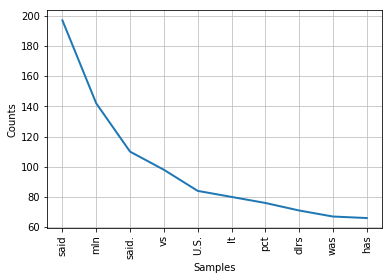

In [12]:
freq_base_tokens.plot(10)

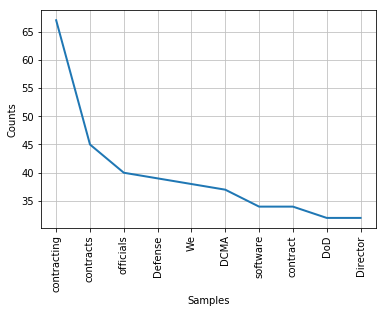

In [13]:
freq_jargon.plot(10)

In [11]:
freq_jargon.most_common(20)

[('contracting', 67),
 ('contracts', 45),
 ('officials', 40),
 ('Defense', 39),
 ('We', 38),
 ('DCMA', 37),
 ('software', 34),
 ('contract', 34),
 ('DoD', 32),
 ('Director', 32),
 ('DLA', 32),
 ('personnel', 31),
 ('requirements', 30),
 ('SRRB', 25),
 ('Force', 24),
 ('EPAWSS', 24),
 ('price', 24),
 ('Air', 23),
 ('analysis', 23),
 ('officers', 23)]

In [12]:
# I used the codes from the lecture notes in class to find the MLEs
MLE_Dist_jargon = nltk.MLEProbDist(freq_jargon)
MLE_Dist_base = nltk.MLEProbDist(freq_base_tokens)
[MLE_Dist_jargon.max(),MLE_Dist_base.max()]

['contracting', 'said']

In [13]:
high_probability_jargon = []

for token in jargon_tokens:
    prob_jargoncorpus = MLE_Dist_jargon.prob(token)
    prob_basecorpus = MLE_Dist_base.prob(token)
    if prob_jargoncorpus > prob_basecorpus:
        high_probability_jargon.append(token)
    
print(high_probability_jargon)

['May', '21', '2018', 'Objective', 'We', 'determined', 'whether', 'Air', 'Force', 'officials', 'updated', 'Eagle', 'Passive/Active', 'Warning', 'Survivability', 'System', 'EPAWSS', 'test', 'evaluation', 'master', 'plan', 'respond', 'concerns', 'raised', 'Air', 'Force', 'DoD', 'test', 'officials', 'developed', 'EPAWSS', 'design', 'meet', 'capability', 'requirements', 'evaluated', 'F-15C', 'EPAWSS', 'production', 'plan', 'during', 'engineering', 'manufacturing', 'development', 'phase.', 'Background', 'Air', 'Force', 'EPAWSS', 'program', 'acquisition', 'category', 'IC', 'defense', 'program', 'program', 'costs', '876', 'million', 'research', 'development', 'test', 'evaluation', '3.4', 'procurement.1', 'EPAWSS', 'upgrades', 'F-15C', 'F-15E', 'aircraft', 'electronic', 'warfare', 'capabilities', 'detect', 'identify', 'air', 'ground', 'threats', 'employ', 'counter-measures', 'jam', 'enemy', 'radar', 'signals.', 'F-15', 'all-weather', 'day', 'night', 'tactical', 'fighter', 'aircraft', 'designed

In [14]:
len(high_probability_jargon)

4429

## Analysis of Results

Firstly, I built one sample corpus from reuters news and one jargon corpus from government documents. Secondly, I tokenized them and find the words only showed up in the jargon corpus, i.e. taking the different of two sets. A key implementation in my method is to remove "noise" words
by using piece of codes from the lecture notes.
Regarding my outputs, I think my method works well. For example, most words in the top 20 most frequent jargon words are rare in daily English and are related to government affairs.
If I have extra time, I will read in the whole reuters data set and try to apply the smooth distribution, and have a closer look at the distribution on the jargon corpus. 